In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#create class with defined function and first derivative of function 
class F(object):
  def __init__(self):
    pass
  
  def func(self, x1, x2):
    y = 2*x1**2-1.05*x1**4+x1**6/6+x1*x2+x2**2 #Three Hump Camel function (2 vars, 3 local minima)
    return y
  
  def deriv(self, x1, x2):
    
    dx1 = 4*x1-4.2*x1**3+x1**5+x2 
    dx2 = x1+2*x2 
    
    return dx1, dx2 
  
#create class for gradient calculations 
class grad_desc(object):
  def __init__(self, function, alpha = 0.002, n_iter = 10000, tol = 1e-5):
    self.alpha = alpha
    self.n_iter = n_iter
    self.tol = tol
    self.function = function

#define gradient descent algorithm (specify direction logic for gradient descent)
  def grad_desc(self, x1, x2):
    
    dx1, dx2 = self.function.deriv(x1, x2)
    
    new_x1 = x1 - self.alpha * dx1
    new_x2 = x2 - self.alpha * dx2
    
    return new_x1, new_x2, dx1, dx2
  
#create for loop to perform multiple iterations and record path of gradient descent
  def optimise(self, start_x1 = -5, start_x2 = 6):
    all_x1 = [start_x1]
    all_x2 = [start_x2]
    all_y = [self.function.func(start_x1, start_x2)]
    
    
    for i in range(self.n_iter):
      x1,x2,dx1,dx2 = self.grad_desc(all_x1[i], all_x2[i])
      
      all_x1.append(x1)
      all_x2.append(x2)
      y = self.function.func(x1, x2)
      all_y.append(y)
      
      print("i", i, "x1", x1,"x2", x2,"y", y)
      
      if (np.abs(dx1) + np.abs(dx2)  < 2*self.tol):
        break
    
    return all_x1, all_x2, all_y
  
#call function and apply gradient descent calculations from classes created
function1 = F()
gd = grad_desc(function = function1)

#output path of gradient descent
all_x1, all_x2, all_y = gd.optimise()


i 0 x1 0.22799999999999976 x2 5.986 y 37.298157959972514
i 1 x1 0.21430232749146702 x2 5.9616 y 36.90791182674099
i 2 x1 0.2007464771664195 x2 5.9373249953450165 y 36.52262915852117
i 3 x1 0.18733315858618127 x2 5.913174202409303 y 36.142264229568674
i 4 x1 0.17406290689955656 x2 5.8891468392824935 y 35.76676907854099
i 5 x1 0.16093608981346147 x2 5.865242126111564 y 35.39609370369772
i 6 x1 0.14795291475081535 x2 5.841459285427491 y 35.030186255453685
i 7 x1 0.13511343614220847 x2 5.81779754245628 y 34.668993225172926
i 8 x1 0.12241756280168233 x2 5.7942561254141705 y 34.31245962923529
i 9 x1 0.10986506534086146 x2 5.7708342657869105 y 33.96052918754562
i 10 x1 0.0974555835796084 x2 5.747531198593081 y 33.613144495788575
i 11 x1 0.08518863391528339 x2 5.72434616263155 y 33.27024719085746
i 12 x1 0.07306361661653726 x2 5.701278400713193 y 32.931778109002984
i 13 x1 0.06107982301131137 x2 5.678327159877107 y 32.59767743635674
i 14 x1 0.04923644254233171 x2 5.655491691591576 y 32.2678848

In [5]:
#for comparison of performance of plain vanilla GD with different stepsizes 
min_y = min(all_y)
print("min y:", min(all_y))

index_min_y = all_y.index(min_y)

print("min(x1, x2) is",(all_x1[index_min_y], all_x2[index_min_y])) #much better results then with stepsize=0.0005 

min y: 0.29863844232372505
min(x1, x2) is (-1.7475532736677433, 0.8737856838794364)


Experiments with stepsize, results: 

stepsize = 0.0004
min y: 2.774345284688475e-07 
min(x1, x2) is (-0.00022632717489901613, 0.0005465139636496936)


stepsize = 0.00035
min y: 1.356463774173904e-06
min(x1, x2) is (-0.000500176366363169, 0.0012085531769722197)


stepsize = 0.0003
min y: 6.6313599851671905e-06 
min(x1, x2) is (-0.0011034152633559045, 0.0026731911611193497)


stepsize = 0.0005
min y: 1.1601150361756083e-08 
min(x1, x2) is (-4.6289062888230705e-05, 0.00011175302435649475)


stepsize = 0.0001
min y: 0.005114320240766271 
min(x1, x2) is (-0.0037383778076813924, 0.0732124673240082)


stepsize = 0.00009
min y: 0.008415657175000986 
min(x1, x2) is (0.00431621630625691, 0.08940091938547981)


stepsize = 0.00005 
min y: 0.1273124883722485 
min(x1, x2) is (0.14699631885595685, 0.22648050322772673)

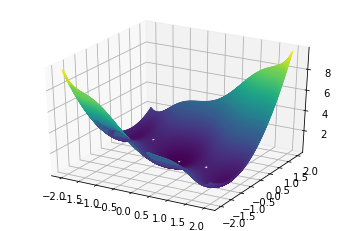

In [70]:
#plot graph for Three Hump Camel function
Axes3D = Axes3D 

all_x1 = np.linspace(-2,2)
all_x2 = np.linspace(-2,2)

X1, X2= np.meshgrid(all_x1, all_x2)
Z = function1.func(X1,X2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1,X2,Z,1000)
plt.show()
